PROJECT OVERVIEW
  This is a complete end-to-end machine learning project designed to predict loan defaults using a simulated Lending Club dataset (2007-2014). The system
  helps financial institutions make informed lending decisions by predicting whether borrowers will default on their loans, with an interactive dashboard
  for real-time risk assessment.

  DATASET INFORMATION
   - Source: Lending Club Loan Data (2007-2014)
   - Size: 466,285 loan records with 75 initial features
   - Target Variable: Binary classification (0 = "Fully Paid", 1 = "Charged Off")
   - Class Distribution: ~82% repaid, ~18% defaulted (imbalanced dataset)

  PREPROCESSING PIPELINE
   1. Filtering: Retained only completed loans ("Fully Paid" and "Charged Off"), excluded ongoing loans
   2. Cleaning: Removed 47 columns with >50% missing values, imputed missing values using median (numerical) and mode (categorical)
   3. Transformation: Converted text fields to numeric (employment length, interest rates), calculated average FICO scores

  FEATURE ENGINEERING
   - Financial Ratios: loan_to_income ratio, payment_to_income ratio
   - Credit Scores: Average FICO scores from low/high ranges
   - Encoding: One-hot encoding for categorical variables (grades, home ownership, etc.)
   - Standardization: Scaled all numerical features to mean=0, std=1

  MACHINE LEARNING MODELS
  Five different algorithms were trained and compared:
   1. Logistic Regression: Interpretable baseline model with probability outputs
   2. Random Forest: Ensemble method capturing non-linear relationships
   3. XGBoost: High-performance gradient boosting with regularization
   4. Support Vector Machine: Effective in high-dimensional feature spaces
   5. Neural Network: Complex non-linear pattern recognition

  MODEL EVALUATION METRICS
   - Accuracy: Overall percentage of correct predictions
   - Precision: Percentage of predicted defaults that actually defaulted
   - Recall/Sensitivity: Percentage of actual defaults correctly identified
   - ROC-AUC: Area under the ROC curve measuring discrimination ability

  BUSINESS IMPACT
   - Reduces financial losses from defaulted loans
   - Enables faster, data-driven loan approval decisions
   - Allows for risk-based pricing strategies
   - Improves portfolio risk management
   - Provides regulatory compliance through model interpretability

  TECHNICAL ARCHITECTURE
   - Frontend: Streamlit interactive dashboard
   - ML Frameworks: Scikit-learn, XGBoost, TensorFlow/Keras
   - Data Processing: Pandas, NumPy
   - Visualizations: Plotly, Matplotlib, Seaborn

  DASHBOARD FEATURES
   - Real-time individual loan risk prediction
   - Interactive model comparison and performance metrics
   - Feature importance analysis for risk factors
   - Risk categorization (Low: <30%, Medium: 30-60%, High: >60% default probability)
   - Business recommendations based on predictions

  This project represents a comprehensive solution from raw data to production-ready dashboard, demonstrating proficiency in data preprocessing, machine
  learning, and business application.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import os

In [2]:
# Load the dataset
df = pd.read_csv('../Dataset/raw/loan_data_2007_2014.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Target variable distribution
print("\nTarget Variable Distribution:")
print(df['loan_status'].value_counts(normalize=True))

C:\Users\user\AppData\Local\Temp\ipykernel_32296\787199053.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/raw/loan_data_2007_2014.csv')


Dataset Shape: (466285, 75)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length     

In [3]:
# Eksplorasi Unique Values dari setiap kolom
print("=" * 80)
print("UNIQUE VALUES PER COLUMN")
print("=" * 80)

for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{'='*60}")
    print(f"📊 Column: {col}")
    print(f"   Data Type: {df[col].dtype}")
    print(f"   Unique Values: {unique_count}")
    print(f"   Missing Values: {df[col].isnull().sum()} ({df[col].isnull().mean()*100:.2f}%)")
    
    # Tampilkan sample unique values
    if unique_count <= 20:
        # Jika unique values <= 20, tampilkan semua dengan value counts
        print(f"   Value Counts:")
        value_counts = df[col].value_counts(dropna=False).head(20)
        for val, count in value_counts.items():
            pct = count / len(df) * 100
            print(f"      - {val}: {count} ({pct:.2f}%)")
    else:
        # Jika lebih dari 20, tampilkan sample
        print(f"   Sample Values (first 10):")
        sample_vals = df[col].dropna().unique()[:10]
        for val in sample_vals:
            print(f"      - {val}")
        print(f"   ...")
        print(f"   (dan {unique_count - 10} nilai unik lainnya)")

UNIQUE VALUES PER COLUMN

📊 Column: Unnamed: 0
   Data Type: int64
   Unique Values: 466285
   Missing Values: 0 (0.00%)
   Sample Values (first 10):
      - 0
      - 1
      - 2
      - 3
      - 4
      - 5
      - 6
      - 7
      - 8
      - 9
   ...
   (dan 466275 nilai unik lainnya)

📊 Column: id
   Data Type: int64
   Unique Values: 466285
   Missing Values: 0 (0.00%)
   Sample Values (first 10):
      - 1077501
      - 1077430
      - 1077175
      - 1076863
      - 1075358
      - 1075269
      - 1069639
      - 1072053
      - 1071795
      - 1071570
   ...
   (dan 466275 nilai unik lainnya)

📊 Column: member_id
   Data Type: int64
   Unique Values: 466285
   Missing Values: 0 (0.00%)
   Sample Values (first 10):
      - 1296599
      - 1314167
      - 1313524
      - 1277178
      - 1311748
      - 1311441
      - 1304742
      - 1288686
      - 1306957
      - 1306721
   ...
   (dan 466275 nilai unik lainnya)

📊 Column: loan_amnt
   Data Type: int64
   Unique Values: 1352

In [4]:
# Ringkasan Kolom berdasarkan Tipe dan Jumlah Unique Values
summary_data = []

for col in df.columns:
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    missing_pct = df[col].isnull().mean() * 100
    
    # Kategorisasi kolom
    if unique_count <= 2:
        category = "Binary"
    elif unique_count <= 10:
        category = "Low Cardinality"
    elif unique_count <= 50:
        category = "Medium Cardinality"
    else:
        category = "High Cardinality"
    
    summary_data.append({
        'Column': col,
        'Data Type': str(df[col].dtype),
        'Unique Count': unique_count,
        'Missing Count': missing_count,
        'Missing %': round(missing_pct, 2),
        'Category': category
    })

summary_df = pd.DataFrame(summary_data)

# Display summary
print("=" * 100)
print("COLUMN SUMMARY")
print("=" * 100)
print(f"\nTotal Columns: {len(df.columns)}")
print(f"Total Rows: {len(df)}")
print(f"\nBy Category:")
print(summary_df['Category'].value_counts())
print(f"\nBy Data Type:")
print(summary_df['Data Type'].value_counts())

# Tampilkan tabel
print("\n" + "=" * 100)
print("DETAILED COLUMN INFO")
print("=" * 100)
print(summary_df.to_string(index=False))

# Kolom dengan missing values tinggi (>50%)
print("\n" + "=" * 100)
print("COLUMNS WITH HIGH MISSING VALUES (>50%)")
print("=" * 100)
high_missing = summary_df[summary_df['Missing %'] > 50].sort_values('Missing %', ascending=False)
print(high_missing.to_string(index=False))

COLUMN SUMMARY

Total Columns: 75
Total Rows: 466285

By Category:
Category
High Cardinality      40
Binary                22
Medium Cardinality     7
Low Cardinality        6
Name: count, dtype: int64

By Data Type:
Data Type
float64    46
object     22
int64       7
Name: count, dtype: int64

DETAILED COLUMN INFO
                     Column Data Type  Unique Count  Missing Count  Missing %           Category
                 Unnamed: 0     int64        466285              0       0.00   High Cardinality
                         id     int64        466285              0       0.00   High Cardinality
                  member_id     int64        466285              0       0.00   High Cardinality
                  loan_amnt     int64          1352              0       0.00   High Cardinality
                funded_amnt     int64          1354              0       0.00   High Cardinality
            funded_amnt_inv   float64          9854              0       0.00   High Cardinality
    

In [8]:
# Fokus pada Kolom-Kolom PENTING untuk Credit Risk
important_cols = [
    # Target
    'loan_status',
    # Loan Info
    'loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'term', 'grade', 'sub_grade', 'purpose',
    # Borrower Info
    'annual_inc', 'emp_length', 'home_ownership', 'verification_status',
    # Credit History
    'dti', 'fico_range_low', 'fico_range_high', 'delinq_2yrs', 'inq_last_6mths',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    # Delinquency
    'acc_now_delinq', 'mths_since_last_delinq', 'collections_12_mths_ex_med',
    # Others
    'application_type', 'addr_state'
]

# Filter kolom yang ada di dataset
existing_important_cols = [col for col in important_cols if col in df.columns]

print("=" * 80)
print("UNIQUE VALUES UNTUK KOLOM-KOLOM PENTING")
print("=" * 80)

for col in existing_important_cols:
    unique_count = df[col].nunique()
    print(f"\n{'='*60}")
    print(f"📊 {col.upper()}")
    print(f"   Type: {df[col].dtype} | Unique: {unique_count} | Missing: {df[col].isnull().sum()}")
    
    if unique_count <= 25:
        print(f"   Value Counts:")
        vc = df[col].value_counts(dropna=False)
        for val, count in vc.items():
            pct = count / len(df) * 100
            print(f"      {val}: {count:,} ({pct:.2f}%)")
    else:
        print(f"   Statistics:")
        if df[col].dtype in ['float64', 'int64']:
            print(f"      Min: {df[col].min()}")
            print(f"      Max: {df[col].max()}")
            print(f"      Mean: {df[col].mean():.2f}")
            print(f"      Median: {df[col].median():.2f}")
        else:
            print(f"      Top 10 Values:")
            for val, count in df[col].value_counts().head(10).items():
                pct = count / len(df) * 100
                print(f"         {val}: {count:,} ({pct:.2f}%)")

UNIQUE VALUES UNTUK KOLOM-KOLOM PENTING

📊 LOAN_STATUS
   Type: object | Unique: 9 | Missing: 0
   Value Counts:
      Current: 224,226 (48.09%)
      Fully Paid: 184,739 (39.62%)
      Charged Off: 42,475 (9.11%)
      Late (31-120 days): 6,900 (1.48%)
      In Grace Period: 3,146 (0.67%)
      Does not meet the credit policy. Status:Fully Paid: 1,988 (0.43%)
      Late (16-30 days): 1,218 (0.26%)
      Default: 832 (0.18%)
      Does not meet the credit policy. Status:Charged Off: 761 (0.16%)

📊 LOAN_AMNT
   Type: int64 | Unique: 1352 | Missing: 0
   Statistics:
      Min: 500
      Max: 35000
      Mean: 14317.28
      Median: 12000.00

📊 FUNDED_AMNT
   Type: int64 | Unique: 1354 | Missing: 0
   Statistics:
      Min: 500
      Max: 35000
      Mean: 14291.80
      Median: 12000.00

📊 INT_RATE
   Type: float64 | Unique: 506 | Missing: 0
   Statistics:
      Min: 5.42
      Max: 26.06
      Mean: 13.83
      Median: 13.66

📊 INSTALLMENT
   Type: float64 | Unique: 55622 | Missing: 0
 

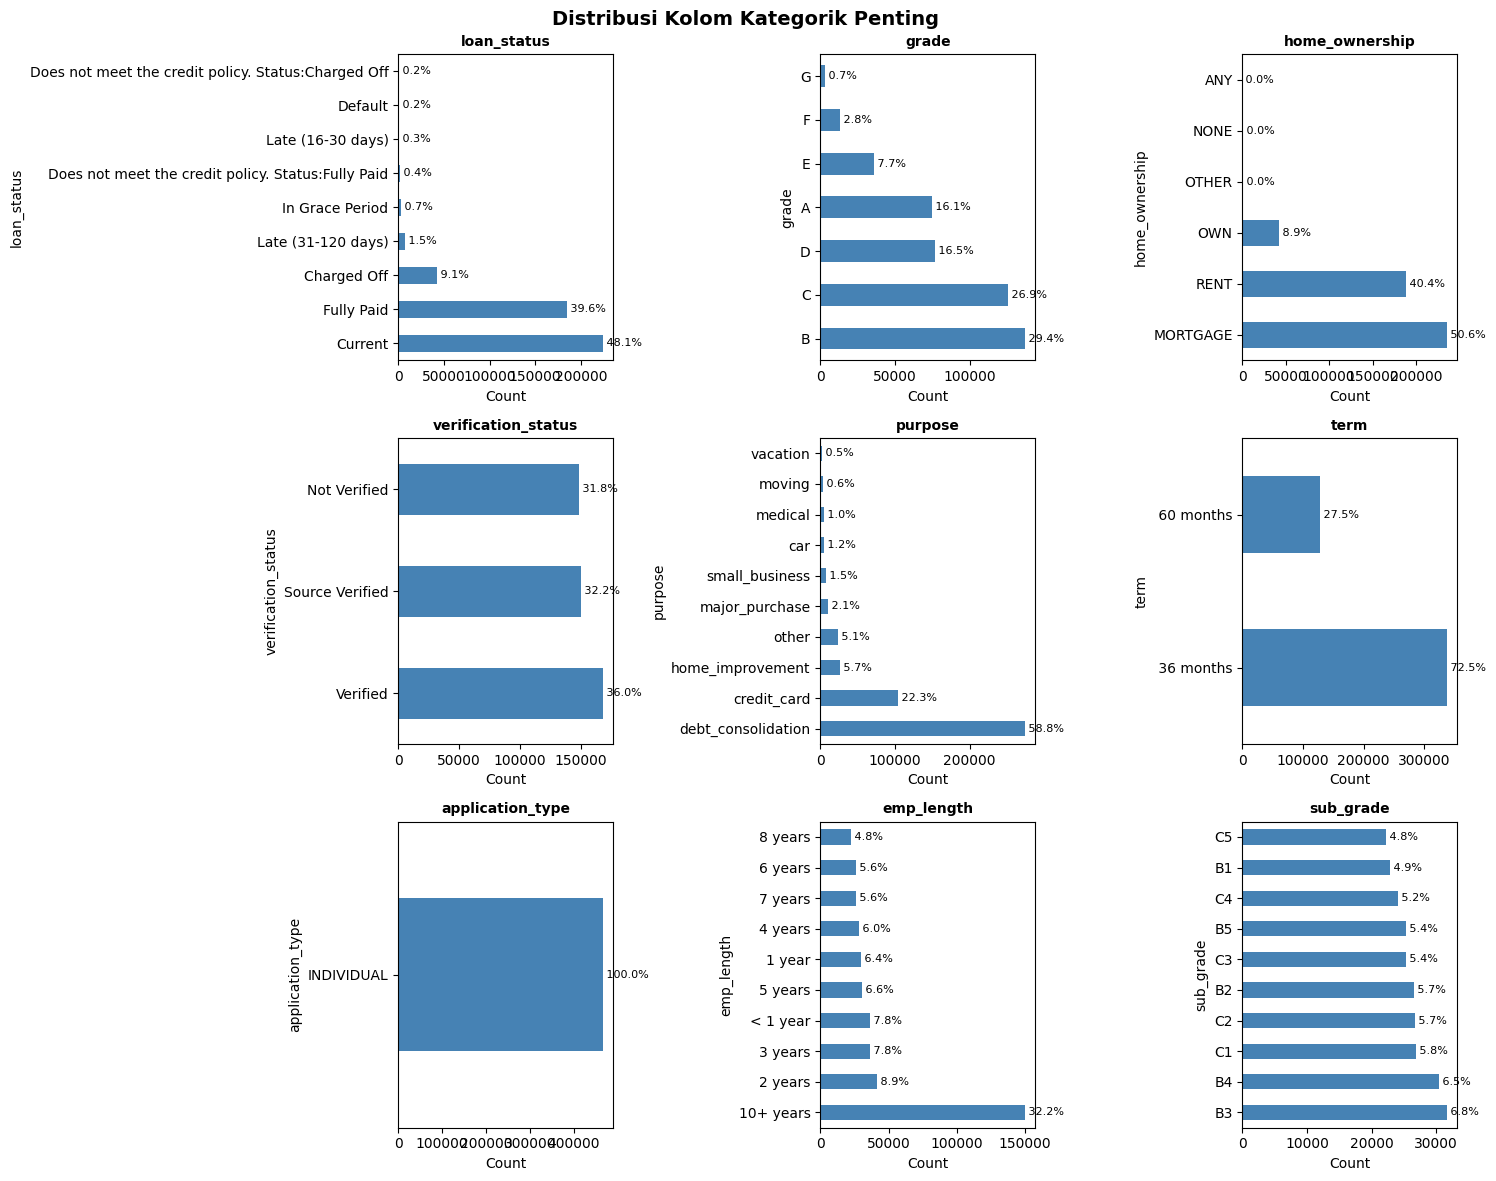

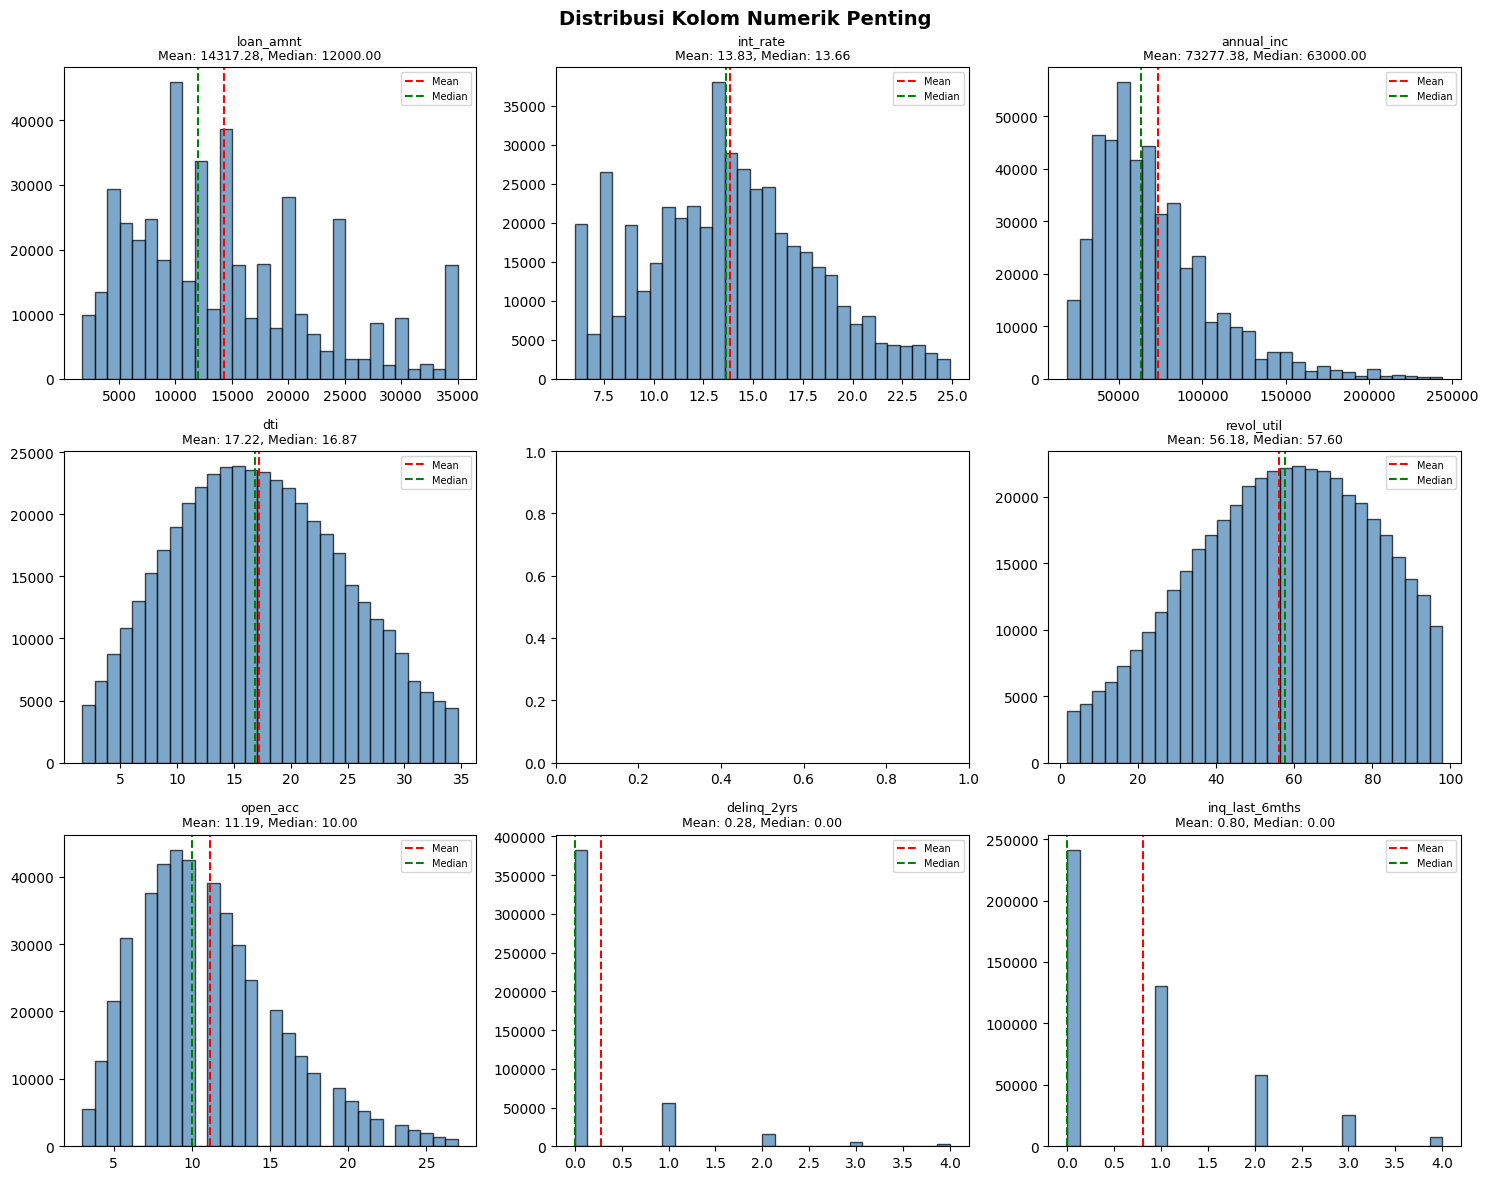

In [ ]:
# Visualisasi Distribusi Kolom Kategorik Penting
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribusi Kolom Kategorik Penting', fontsize=14, fontweight='bold')

categorical_to_plot = ['loan_status', 'grade', 'home_ownership', 'verification_status', 
                       'purpose', 'term', 'application_type', 'emp_length', 'sub_grade']

for idx, col in enumerate(categorical_to_plot):
    if col in df.columns:
        ax = axes[idx // 3, idx % 3]
        vc = df[col].value_counts().head(10)
        vc.plot(kind='barh', ax=ax, color='steelblue')
        ax.set_title(col, fontsize=10, fontweight='bold')
        ax.set_xlabel('Count')
        
        # Tambahkan persentase
        total = len(df)
        for i, (val, count) in enumerate(vc.items()):
            ax.text(count, i, f' {count/total*100:.1f}%', va='center', fontsize=8)

plt.tight_layout()
plt.show()

# Visualisasi Distribusi Kolom Numerik Penting
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribusi Kolom Numerik Penting', fontsize=14, fontweight='bold')

numeric_to_plot = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 
                   'fico_range_low', 'revol_util', 'open_acc', 'delinq_2yrs', 'inq_last_6mths']

for idx, col in enumerate(numeric_to_plot):
    if col in df.columns:
        ax = axes[idx // 3, idx % 3]
        
        # Handle outliers dengan percentile
        data = df[col].dropna()
        q1, q99 = data.quantile([0.01, 0.99])
        data_filtered = data[(data >= q1) & (data <= q99)]
        
        ax.hist(data_filtered, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'{col}\nMean: {data.mean():.2f}, Median: {data.median():.2f}', fontsize=9)
        ax.axvline(data.mean(), color='red', linestyle='--', label='Mean')
        ax.axvline(data.median(), color='green', linestyle='--', label='Median')
        ax.legend(fontsize=7)

plt.tight_layout()
plt.show()

In [4]:
# src/data_preprocessing.py
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

class DataPreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.cleaning_report = {}
        
    def filter_completed_loans(self):
        """Keep only completed loans (Fully Paid and Charged Off)"""
        self.df = self.df[self.df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
        self.cleaning_report['filtered_loans'] = len(self.df)
        return self.df
    
    def create_target_variable(self):
        """Create binary target variable: 0=Fully Paid, 1=Charged Off"""
        self.df['target'] = (self.df['loan_status'] == 'Charged Off').astype(int)
        self.cleaning_report['target_created'] = True
        return self.df
    
    def handle_missing_values(self):
        """Handle missing values in key features"""
        # Drop columns with >50% missing values
        missing_threshold = 0.5
        cols_to_drop = self.df.columns[self.df.isnull().mean() > missing_threshold]
        self.df = self.df.drop(columns=cols_to_drop)
        self.cleaning_report['dropped_columns'] = list(cols_to_drop)
        
        # Impute numeric columns with median
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        imputer = SimpleImputer(strategy='median')
        self.df[numeric_cols] = imputer.fit_transform(self.df[numeric_cols])
        
        # Impute categorical columns with mode
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        imputer = SimpleImputer(strategy='most_frequent')
        self.df[categorical_cols] = imputer.fit_transform(self.df[categorical_cols])
        
        self.cleaning_report['missing_values_handled'] = True
        return self.df
    
    def convert_data_types(self):
        """Convert data types for better analysis"""
        # Convert percentage strings to floats
        if 'int_rate' in self.df.columns:
            self.df['int_rate'] = self.df['int_rate'].str.replace('%', '').astype(float)
        
        # Convert employment length to numeric
        if 'emp_length' in self.df.columns:
            emp_length_map = {
                '< 1 year': 0.5, '1 year': 1, '2 years': 2, '3 years': 3,
                '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                '8 years': 8, '9 years': 9, '10+ years': 10
            }
            self.df['emp_length_numeric'] = self.df['emp_length'].map(emp_length_map)
        
        # Convert term to numeric
        if 'term' in self.df.columns:
            self.df['term_months'] = self.df['term'].str.extract('(\d+)').astype(int)
        
        self.cleaning_report['data_types_converted'] = True
        return self.df
    
    def get_cleaned_data(self):
        return self.df
    
    def get_cleaning_report(self):
        return self.cleaning_report

<>:60: SyntaxWarning: invalid escape sequence '\d'
<>:60: SyntaxWarning: invalid escape sequence '\d'
C:\Users\user\AppData\Local\Temp\ipykernel_12736\2346631048.py:60: SyntaxWarning: invalid escape sequence '\d'
  self.df['term_months'] = self.df['term'].str.extract('(\d+)').astype(int)


In [5]:
# src/feature_engineering.py
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

class FeatureEngineer:
    def __init__(self, df):
        self.df = df.copy()
        self.feature_report = {}
        
    def create_derived_features(self):
        """Create new features from existing data"""
        # FICO score average
        if 'fico_range_low' in self.df.columns and 'fico_range_high' in self.df.columns:
            self.df['fico_avg'] = (self.df['fico_range_low'] + self.df['fico_range_high']) / 2
        
        # Loan to income ratio
        if 'loan_amnt' in self.df.columns and 'annual_inc' in self.df.columns:
            self.df['loan_to_income'] = self.df['loan_amnt'] / self.df['annual_inc']
        
        # Debt to income ratio
        if 'dti' in self.df.columns:
            self.df['dti_ratio'] = self.df['dti'] / 100  # Convert percentage to ratio
        
        # Monthly payment to income ratio
        if 'installment' in self.df.columns and 'annual_inc' in self.df.columns:
            self.df['payment_to_income'] = (self.df['installment'] * 12) / self.df['annual_inc']
        
        self.feature_report['derived_features_created'] = True
        return self.df
    
    def encode_categorical_features(self):
        """Encode categorical features"""
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        categorical_cols = categorical_cols.drop(['loan_status'], errors='ignore')
        
        # One-hot encode categorical variables
        encoder = OneHotEncoder(drop='first', sparse=False)
        encoded = encoder.fit_transform(self.df[categorical_cols])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))
        
        # Drop original categorical columns and add encoded ones
        self.df = pd.concat([self.df.drop(categorical_cols, axis=1), encoded_df], axis=1)
        
        self.feature_report['categorical_encoded'] = list(categorical_cols)
        return self.df
    
    def scale_features(self):
        """Scale numerical features"""
        numeric_cols = self.df.select_dtypes(include=['float64', 'int64']).columns
        numeric_cols = numeric_cols.drop(['target'], errors='ignore')
        
        scaler = StandardScaler()
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
        
        self.feature_report['features_scaled'] = list(numeric_cols)
        return self.df
    
    def get_engineered_features(self):
        return self.df
    
    def get_feature_report(self):
        return self.feature_report

In [6]:
# src/model_training.py - Updated with custom directory path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

class CreditRiskModel:
    def __init__(self):
        self.models = {}
        self.model_metrics = {}
        self.best_model = None
        self.best_model_name = None
        self.available_models = []
        
    def prepare_data(self, df, target_col='target'):
        """Prepare data for modeling"""
        X = df.drop(target_col, axis=1)
        y = df[target_col]
        
        # Split data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def train_logistic_regression(self):
        """Train Logistic Regression model"""
        model = LogisticRegression(random_state=42, max_iter=1000)
        model.fit(self.X_train, self.y_train)
        self.models['logistic_regression'] = model
        self.available_models.append('logistic_regression')
        return model
    
    def train_random_forest(self):
        """Train Random Forest model"""
        model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
        model.fit(self.X_train, self.y_train)
        self.models['random_forest'] = model
        self.available_models.append('random_forest')
        return model
    
    def train_gradient_boosting(self):
        """Train Gradient Boosting model"""
        model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
        model.fit(self.X_train, self.y_train)
        self.models['gradient_boosting'] = model
        self.available_models.append('gradient_boosting')
        return model
    
    def train_neural_network(self, hidden_layer_sizes=(100,), activation='relu', 
                          solver='adam', alpha=0.0001, max_iter=500):
        """Train Neural Network using scikit-learn's MLPClassifier"""
        model = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            max_iter=max_iter,
            random_state=42,
            verbose=False
        )
        model.fit(self.X_train, self.y_train)
        self.models['neural_network'] = model
        self.available_models.append('neural_network')
        return model
    
    def evaluate_model(self, model, model_name):
        """Evaluate model performance"""
        y_pred = model.predict(self.X_test)
        y_pred_proba = model.predict_proba(self.X_test)[:, 1]
        
        metrics = {
            'accuracy': accuracy_score(self.y_test, y_pred),
            'precision': precision_score(self.y_test, y_pred),
            'recall': recall_score(self.y_test, y_pred),
            'f1_score': f1_score(self.y_test, y_pred),
            'roc_auc': roc_auc_score(self.y_test, y_pred_proba),
            'confusion_matrix': confusion_matrix(self.y_test, y_pred)
        }
        
        self.model_metrics[model_name] = {
            'metrics': metrics,
            'model': model
        }
        
        return metrics
    
    def train_all_models(self):
        """Train all available models"""
        print("Training Logistic Regression...")
        lr_model = self.train_logistic_regression()
        self.evaluate_model(lr_model, 'logistic_regression')
        
        print("Training Random Forest...")
        rf_model = self.train_random_forest()
        self.evaluate_model(rf_model, 'random_forest')
        
        print("Training Gradient Boosting...")
        gb_model = self.train_gradient_boosting()
        self.evaluate_model(gb_model, 'gradient_boosting')
        
        print("Training Neural Network...")
        nn_model = self.train_neural_network(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            max_iter=500
        )
        self.evaluate_model(nn_model, 'neural_network')
        
        print("All models trained successfully!")
    
    def find_best_model(self, metric='roc_auc'):
        """Find the best performing model based on specified metric"""
        best_score = -1
        best_model_name = None
        
        for model_name, model_data in self.model_metrics.items():
            if model_name != 'best_model':
                current_score = model_data['metrics'][metric]
                if current_score > best_score:
                    best_score = current_score
                    best_model_name = model_name
        
        self.best_model = self.models[best_model_name]
        self.best_model_name = best_model_name
        self.model_metrics['best_model'] = {
            'name': best_model_name,
            'metric': metric,
            'score': best_score
        }
        
        print(f"Best model: {best_model_name} with {metric}: {best_score:.4f}")
        return self.best_model, best_model_name
    
    def get_model_comparison(self):
        """Return comparison of all models"""
        comparison = {}
        for model_name, model_data in self.model_metrics.items():
            if model_name != 'best_model':
                comparison[model_name] = model_data['metrics']
        
        return pd.DataFrame(comparison).T
    
    def save_model(self, model, filename):
        """Save trained model to file with comprehensive error handling"""
        try:
            # Ensure directory exists
            directory = os.path.dirname(filename)
            if directory and not os.path.exists(directory):
                try:
                    os.makedirs(directory)
                    print(f"✅ Created directory: {directory}")
                except Exception as e:
                    print(f"❌ Error creating directory: {e}")
                    return False
            
            # Validate filename
            if not filename.endswith('.pkl'):
                print(f"⚠️ Warning: Filename doesn't end with .pkl: {filename}")
                filename = filename + '.pkl'
            
            # Save model
            joblib.dump(model, filename)
            print(f"✅ Model saved successfully to: {filename}")
            return True
            
        except Exception as e:
            print(f"❌ Error saving model: {e}")
            print(f"❌ Filename: {filename}")
            print(f"❌ Directory exists: {os.path.exists(directory) if directory else 'N/A'}")
            print(f"❌ Is writable: {os.access(directory, os.W_OK) if directory else 'N/A'}")
            return False
    
    def save_all_models(self, output_dir="D:\\Projek pribadi\\scholarship,exchange,pelatihan\\Rakamin-VIX-Intership-IDX\\models"):
        """Save all trained models to the specified directory"""
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"✅ Created output directory: {output_dir}")
        
        success_count = 0
        for model_name, model in self.models.items():
            filename = os.path.join(output_dir, f"{model_name}.pkl")
            if self.save_model(model, filename):
                success_count += 1
        
        print(f"✅ Saved {success_count}/{len(self.models)} models successfully!")
        return success_count == len(self.models)
    
    def load_model(self, filename):
        """Load trained model from file"""
        try:
            model = joblib.load(filename)
            print(f"✅ Model loaded successfully from: {filename}")
            return model
        except Exception as e:
            print(f"❌ Error loading model: {e}")
            print(f"❌ Filename: {filename}")
            print(f"❌ File exists: {os.path.exists(filename)}")
            return None
    
    def get_available_models(self):
        """Return list of available models"""
        return self.available_models


# Example usage with model selection dropdown
if __name__ == "__main__":
    try:
        print("🚀 Starting Credit Risk Model Training...")
        
        # Create sample data for demonstration
        np.random.seed(42)
        n_samples = 1000
        X = pd.DataFrame({
            'loan_amnt': np.random.uniform(1000, 35000, n_samples),
            'int_rate': np.random.uniform(5, 25, n_samples),
            'annual_inc': np.random.uniform(20000, 150000, n_samples),
            'dti': np.random.uniform(0, 40, n_samples),
            'fico_avg': np.random.uniform(600, 850, n_samples),
            'emp_length_numeric': np.random.uniform(0, 10, n_samples)
        })
        
        y = np.random.choice([0, 1], n_samples, p=[0.85, 0.15])
        df = pd.concat([X, pd.Series(y, name='target')], axis=1)
        
        # Initialize and train models
        credit_model = CreditRiskModel()
        credit_model.prepare_data(df)
        credit_model.train_all_models()
        
        # Find best model
        best_model, best_model_name = credit_model.find_best_model()
        
        # Get model comparison
        comparison_df = credit_model.get_model_comparison()
        print("\n📊 Model Comparison:")
        print(comparison_df)
        
        # Save all models to the specified directory
        print("\n📝 Saving all models...")
        credit_model.save_all_models()
        
        # Save best model separately to the same directory
        output_dir = "D:\\Projek pribadi\\scholarship,exchange,pelatihan\\Rakamin-VIX-Intership-IDX\\models"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"✅ Created output directory: {output_dir}")
        
        filename = os.path.join(output_dir, f"best_{best_model_name}.pkl")
        print(f"📝 Saving best model ({best_model_name}) to: {filename}")
        
        success = credit_model.save_model(best_model, filename)
        
        if success:
            print("✅ Model saved successfully!")
        else:
            print("❌ Model saving failed. Please check the error messages above.")
            
    except Exception as e:
        print(f"❌ Critical error in main execution: {e}")
        import traceback
        traceback.print_exc()

🚀 Starting Credit Risk Model Training...
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...
Training Neural Network...
All models trained successfully!
Best model: logistic_regression with roc_auc: 0.5871

📊 Model Comparison:
                    accuracy precision    recall  f1_score   roc_auc  \
logistic_regression    0.845       0.0       0.0       0.0  0.587135   
random_forest           0.85       1.0  0.032258    0.0625  0.543806   
gradient_boosting      0.845       0.5  0.032258  0.060606  0.472418   
neural_network          0.83  0.333333  0.096774      0.15  0.478336   

                        confusion_matrix  
logistic_regression  [[169, 0], [31, 0]]  
random_forest        [[169, 0], [30, 1]]  
gradient_boosting    [[168, 1], [30, 1]]  
neural_network       [[163, 6], [28, 3]]  

📝 Saving all models...
✅ Model saved successfully to: D:\Projek pribadi\scholarship,exchange,pelatihan\Rakamin-VIX-Intership-IDX\models\logistic_regression.pkl
